In [1]:
# Initial imports
import pandas as pd
import datetime as dt
from pathlib import Path
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
chain_path = Path("../Resources/chain-usd-max.csv")
chain_df = pd.read_csv(chain_path, index_col="snapped_at", infer_datetime_format=True, parse_dates=True)
chain_df.index = chain_df.index.date
chain_df

,price,market_cap,total_volume
2020-08-27,0.047621,1.391839e+07,2.990918e+06
2020-08-28,0.047621,1.391839e+07,2.990918e+06
2020-08-29,0.047256,1.390183e+07,1.706651e+06
2020-08-30,0.046563,1.388543e+07,9.427167e+05
2020-08-31,0.048189,1.429971e+07,1.618922e+06
...,...,...,...
2021-04-02,0.767179,2.250657e+08,4.679297e+06
2021-04-03,0.739599,2.177533e+08,4.989173e+06
2021-04-04,0.655224,1.935734e+08,3.053033e+06
2021-04-05,0.641372,1.882143e+08,3.768709e+06


____________________________________________________________
** PLot Daily Prices **
____________________________________________________________

In [3]:
chain_prices = chain_df[['price']]
chain_prices

,price
2020-08-27,0.047621
2020-08-28,0.047621
2020-08-29,0.047256
2020-08-30,0.046563
2020-08-31,0.048189
...,...
2021-04-02,0.767179
2021-04-03,0.739599
2021-04-04,0.655224
2021-04-05,0.641372


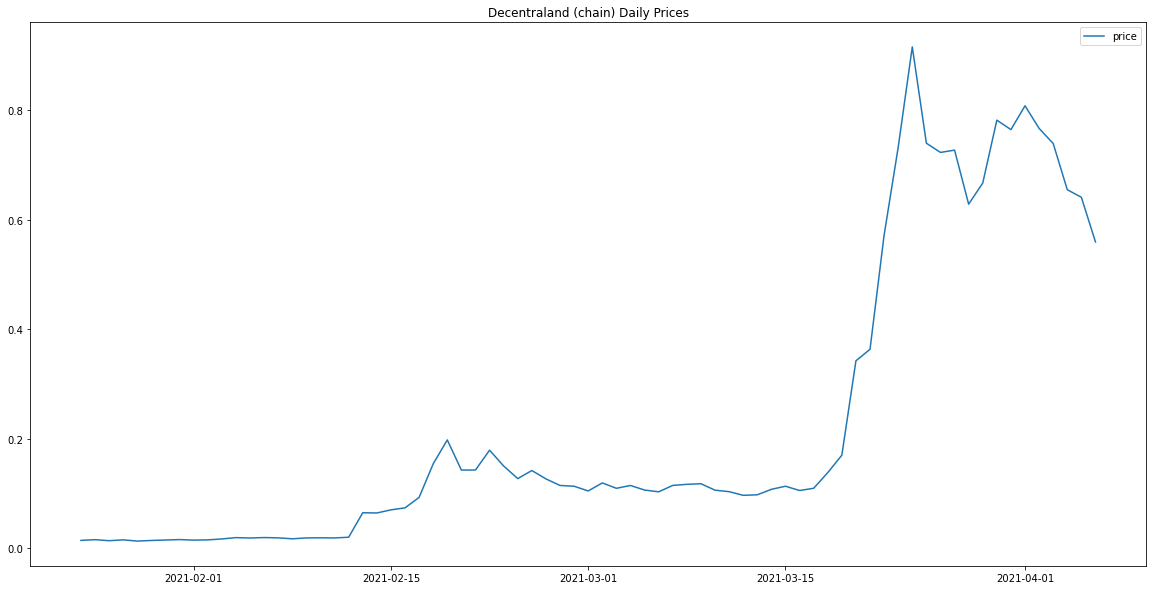

In [14]:
recent_chain_prices = chain_prices.iloc[150:]
recent_chain_prices.plot(figsize=[20,10], title="Recent Chaingames (chain) Daily Prices");

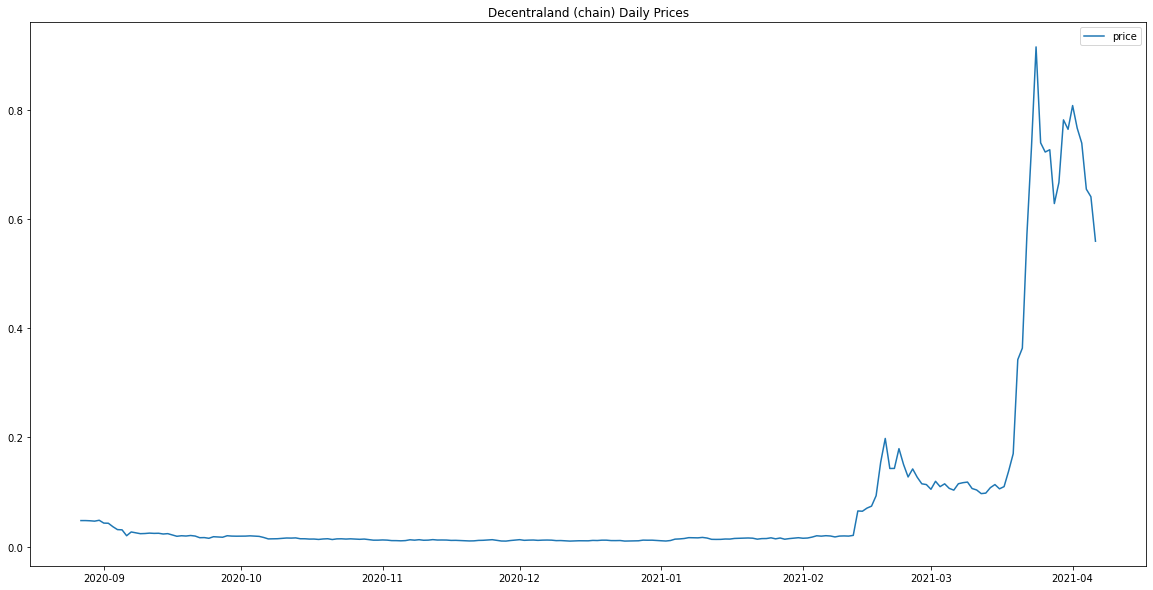

In [4]:
chain_prices.plot(figsize=[20,10], title="Decentraland (chain) Daily Prices");

____________________________________________________________
** Calculate Daily Returns **
____________________________________________________________

In [5]:
chain_daily_returns = chain_prices.pct_change().dropna()
chain_daily_returns = chain_daily_returns.rename(columns={'price': 'returns'})
chain_daily_returns

,returns
2020-08-28,0.000000
2020-08-29,-0.007667
2020-08-30,-0.014654
2020-08-31,0.034902
2020-09-01,-0.107508
...,...
2021-04-02,-0.051129
2021-04-03,-0.035949
2021-04-04,-0.114083
2021-04-05,-0.021141


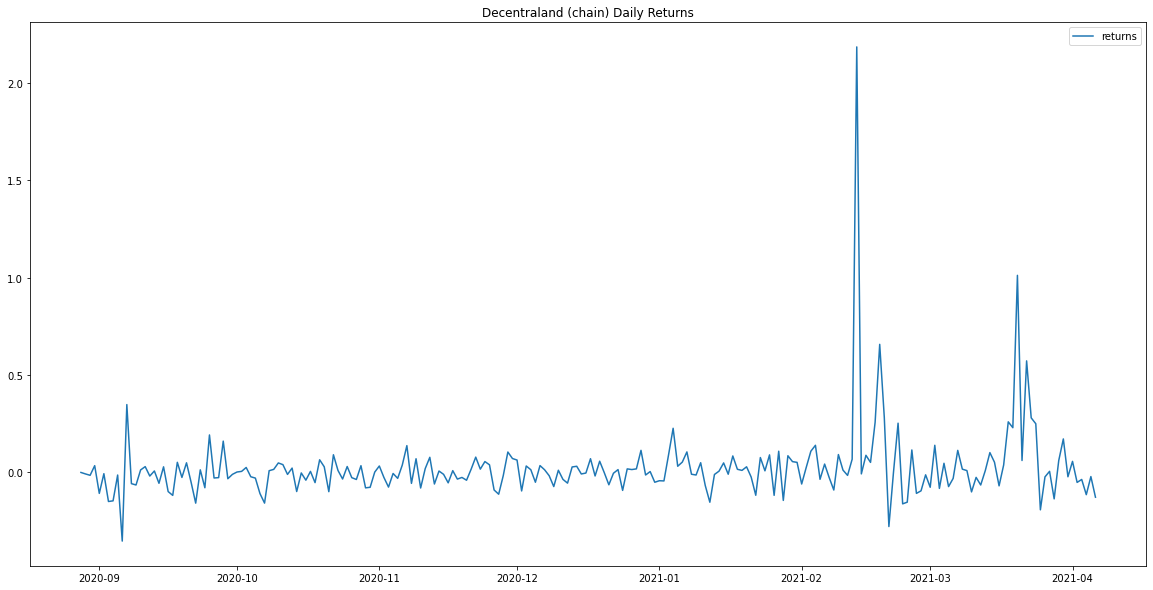

In [6]:
chain_daily_returns.plot(figsize=[20,10], title="Decentraland (chain) Daily Returns");

____________________________________________________________
** Calculate Cumulative Returns **
____________________________________________________________

In [7]:
chain_cumulative_returns = (1 + chain_daily_returns).cumprod()
chain_daily_returns = chain_daily_returns.rename(columns={'returns': 'cumulative returns'})
chain_cumulative_returns

,returns
2020-08-28,1.000000
2020-08-29,0.992333
2020-08-30,0.977791
2020-08-31,1.011918
2020-09-01,0.903129
...,...
2021-04-02,16.110079
2021-04-03,15.530931
2021-04-04,13.759120
2021-04-05,13.468239


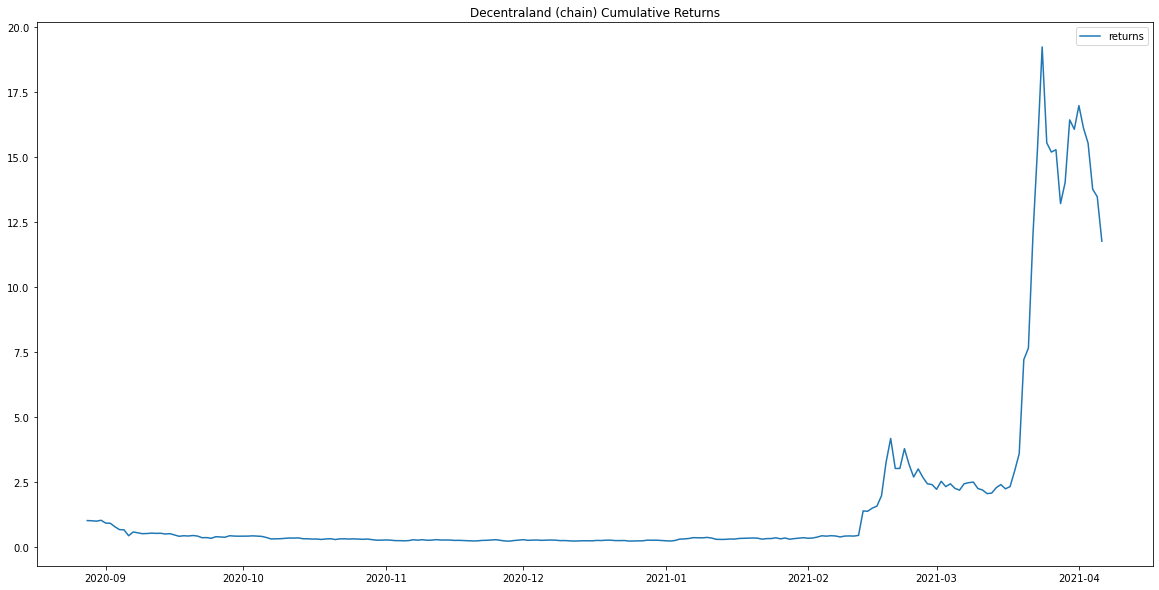

In [8]:
chain_cumulative_returns.plot(figsize=[20,10], title="Decentraland (chain) Cumulative Returns");

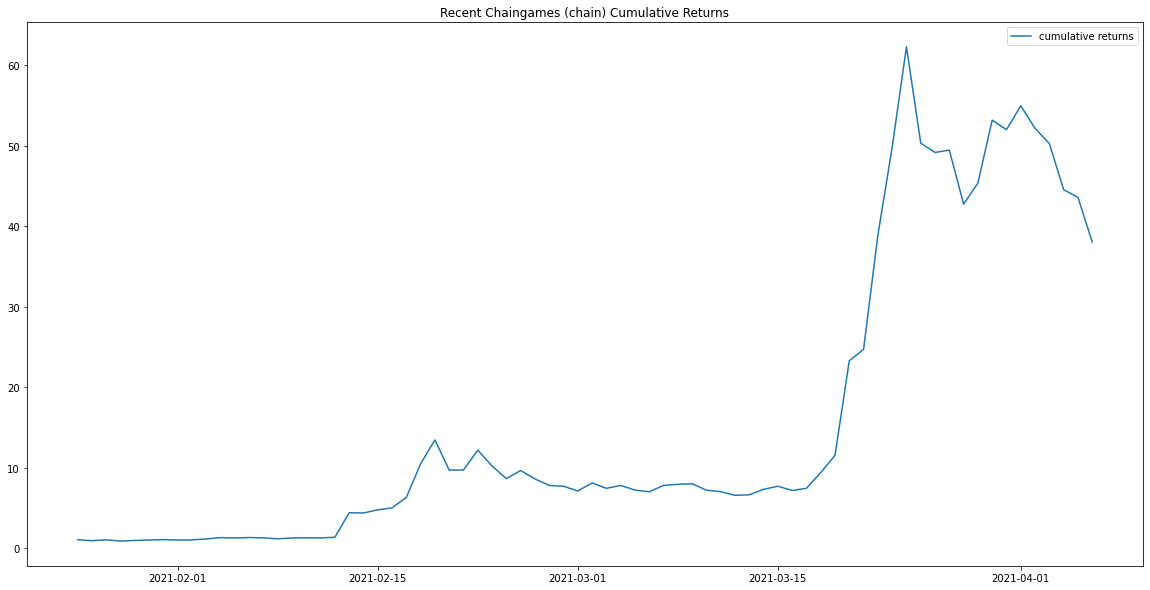

In [11]:
recent_chain_prices = chain_prices.iloc[150:]
recent_chain_returns = recent_chain_prices.pct_change().dropna()
recent_chain_cumulative_returns = (1 + recent_chain_returns).cumprod()
recent_chain_cumulative_returns = recent_chain_cumulative_returns.rename(columns={'price': 'cumulative returns'})
recent_chain_cumulative_returns.plot(figsize=[20,10], title="Recent Chaingames (chain) Cumulative Returns");

____________________________________________________________
** Rolling Statistics **
____________________________________________________________

** >>>>>>>>> Rolling Means **

In [60]:
# Rolling 7 Day Mean

chain_7d_rolling_mean_price = chain_prices.rolling(window=7).mean().round(2).dropna()
chain_7d_rolling_mean_price = chain_7d_rolling_mean_price.rename(columns={'price': '7-day rolling price average'})

chain_30d_rolling_mean_price = chain_prices.rolling(window=30).mean().round(2).dropna()
chain_30d_rolling_mean_price = chain_30d_rolling_mean_price.rename(columns={'price': '30-day rolling price average'})

chain_180d_rolling_mean_price = chain_prices.rolling(window=180).mean().round(2).dropna()
chain_180d_rolling_mean_price = chain_180d_rolling_mean_price.rename(columns={'price': '180-day rolling price average'})


chain_7d_rolling_mean_price.head()

,7-day rolling price average
2020-09-02,0.05
2020-09-03,0.04
2020-09-04,0.04
2020-09-05,0.04
2020-09-06,0.04


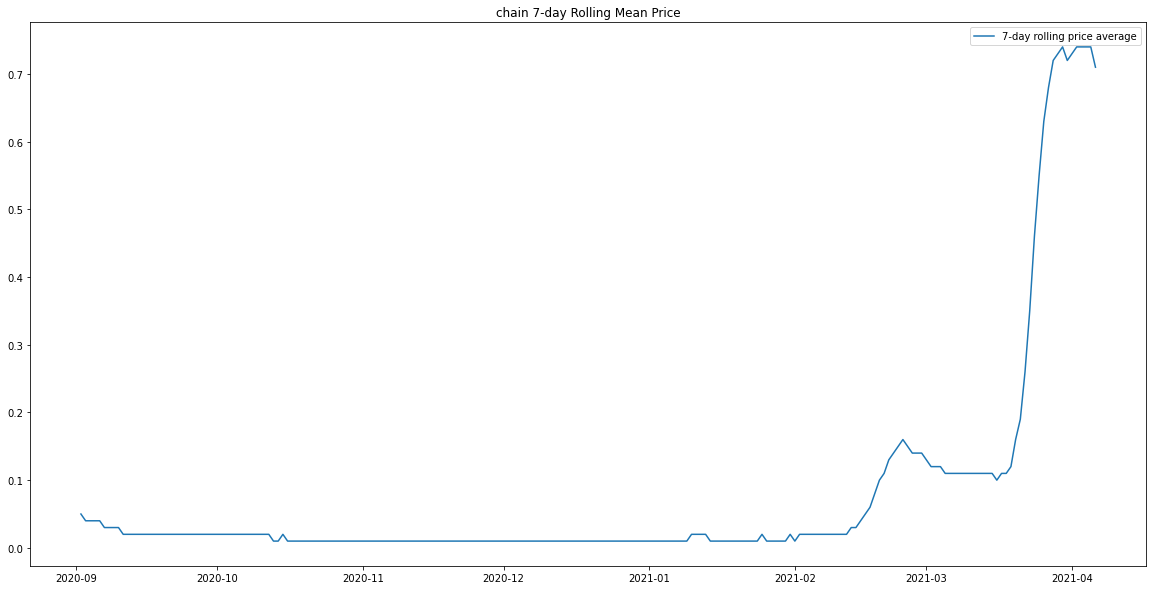

In [61]:
chain_7d_rolling_mean_price.plot(title="chain 7-day Rolling Mean Price", figsize=[20, 10]);

In [62]:
# mana_30d_rolling_mean_price.plot(title="Mana 30-day Rolling Mean Price", figsize=[20, 10]);

In [63]:
# mana_180d_rolling_mean_price.plot(title="Mana 180-day Rolling Mean Price", figsize=[20, 10]);

** >>>>>>>>> 7 Day Rolling Stdev **

In [64]:
# Rolling 7 Day Standard Deviation

chain_7d_rolling_price_std = chain_prices.rolling(window=7).std().round(2).dropna()
chain_7d_rolling_price_std = chain_7d_rolling_price_std.rename(columns={'price': '7-day rolling price stdev'})

chain_30d_rolling_price_std = chain_prices.rolling(window=30).std().round(2).dropna()
chain_30d_rolling_price_std = chain_30d_rolling_price_std.rename(columns={'price': '30-day rolling price average'})

chain_180d_rolling_price_std = chain_prices.rolling(window=180).std().round(2).dropna()
chain_180d_rolling_price_std = chain_180d_rolling_price_std.rename(columns={'price': '180-day rolling price average'})


chain_7d_rolling_price_std.head()

,7-day rolling price stdev
2020-09-02,0.00
2020-09-03,0.00
2020-09-04,0.01
2020-09-05,0.01
2020-09-06,0.01


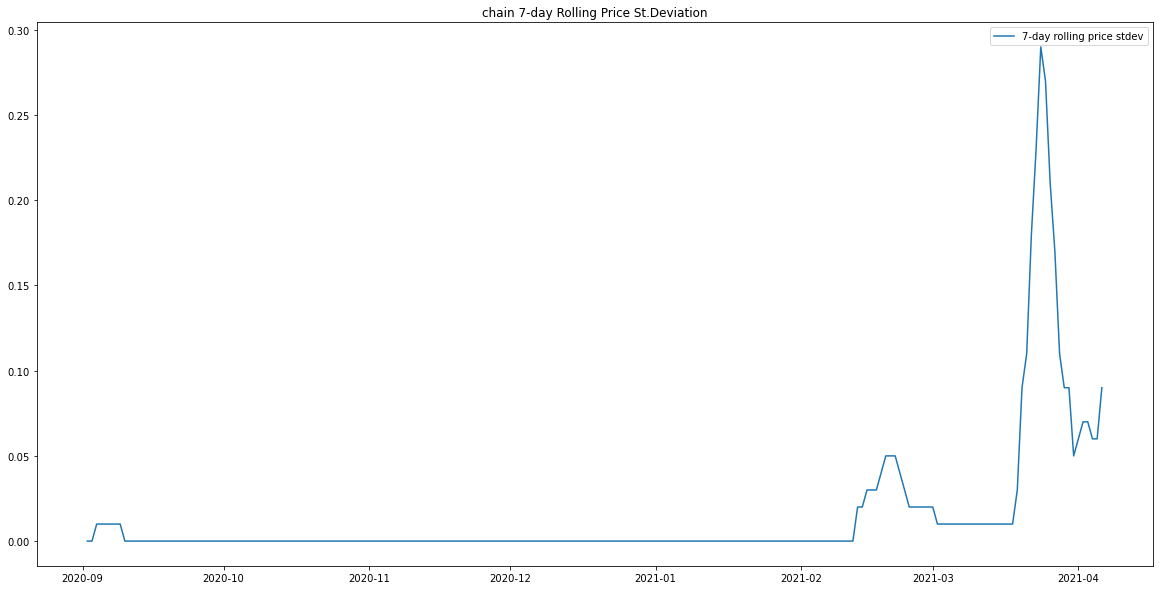

In [65]:
chain_7d_rolling_price_std.plot(title="chain 7-day Rolling Price St.Deviation", figsize=[20, 10]);

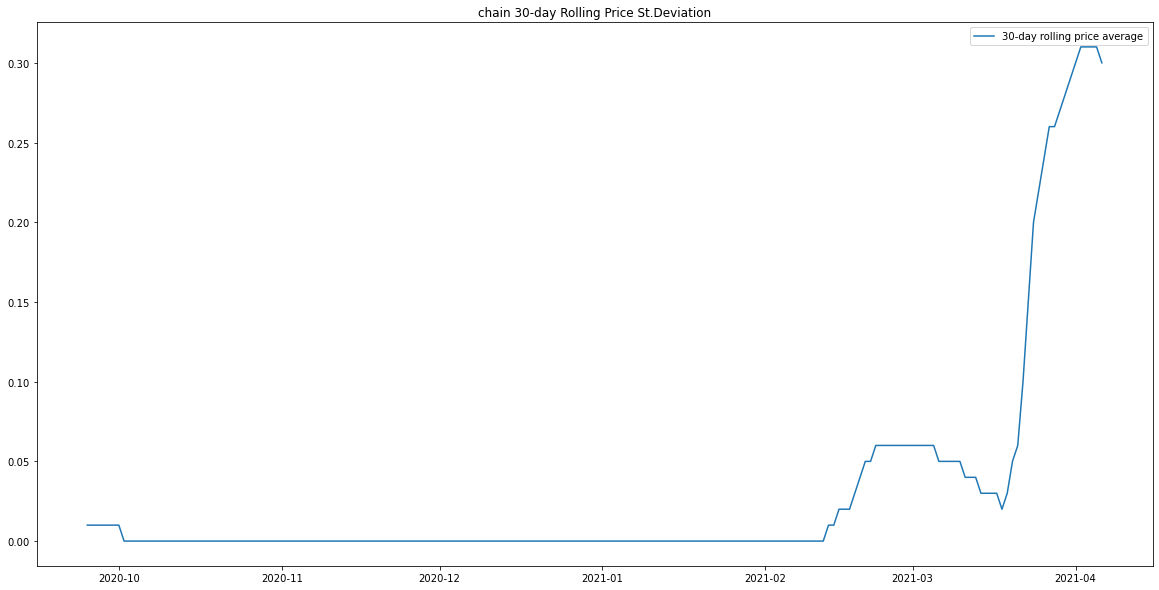

In [66]:
chain_30d_rolling_price_std.plot(title="chain 30-day Rolling Price St.Deviation", figsize=[20, 10]);

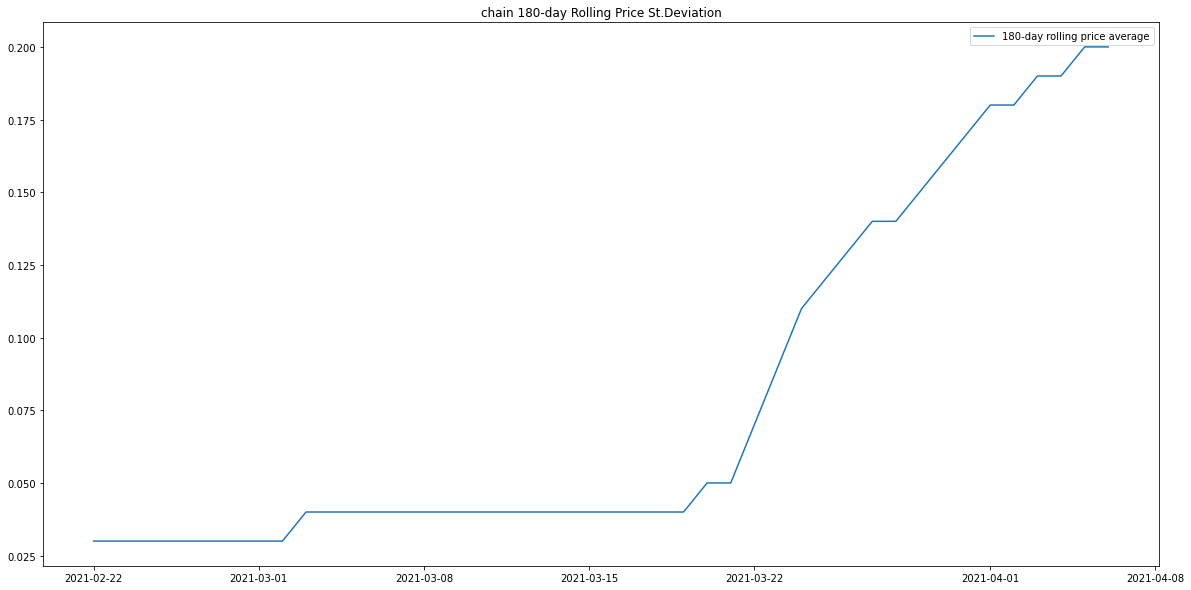

In [67]:
chain_180d_rolling_price_std.plot(title="chain 180-day Rolling Price St.Deviation", figsize=[20, 10]);

** Add rolling averages on original plot **

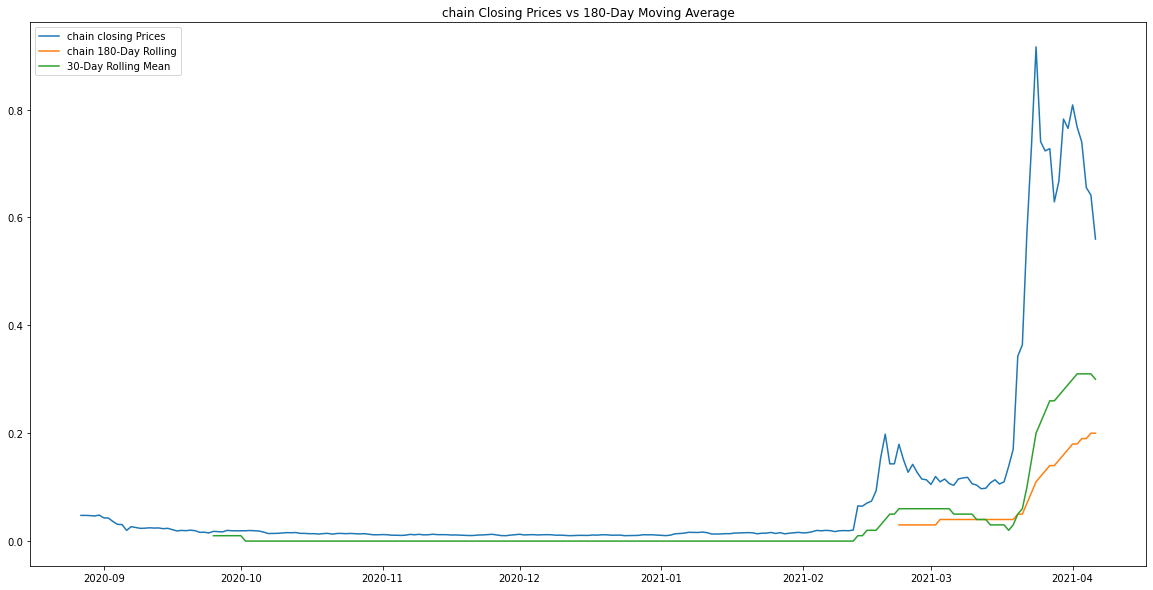

In [68]:
# Set figure of the daily closing prices of chain
chain_prices_plot = chain_prices.plot(figsize=[20,10], title="chain Closing Prices vs 180-Day Moving Average");

# Plot Rolling Means on the same figure
chain_180d_rolling_price_std.plot(ax=chain_prices_plot);
chain_30d_rolling_price_std.plot(ax=chain_prices_plot);


# Set the legend of the figure
chain_prices_plot.legend(['chain closing Prices', 'chain 180-Day Rolling', '30-Day Rolling Mean']);

In [69]:
# Therefore, 180 Day rolling average is very much below. Therefore, bull market

____________________________________________________________
** BETA CALCULATIONS **
____________________________________________________________

** import index csv into dataframe **

In [70]:
index_path = Path("../Resources/index_exports/2021-04-08-21-20-index.csv")
index_daily_prices_df = pd.read_csv(index_path, infer_datetime_format=True, parse_dates=True)
columns = ['date', 'daily_index_prices']
index_daily_prices_df.columns = columns
index_daily_prices_df['date'] = pd.to_datetime(index_daily_prices_df['date']).dt.date
index_daily_prices_df.set_index(index_daily_prices_df['date'], inplace=True)
index_daily_prices_df.drop(['date'], axis=1, inplace=True)
index_daily_prices_df


,daily_index_prices
date,
2021-01-27,3.028557
2021-01-28,2.749223
2021-01-29,3.204606
2021-01-30,3.041754
2021-01-31,2.997350
...,...
2021-04-02,10.185568
2021-04-03,10.247017
2021-04-04,9.795024


________________________________________________
### Combine DataFrames, Sort Index, and Rename Columns
________________________________________________

In [71]:
recent_chain_prices.head()

,price
2021-01-04,0.013570
2021-01-05,0.014003
2021-01-06,0.014749
2021-01-07,0.016305
2021-01-08,0.016157


In [72]:
# Create a new pivot table where the columns are the closing prices for each ticker
chain_v_index_prices_df = pd.concat([chain_prices, index_daily_prices_df], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
chain_v_index_prices_df = chain_v_index_prices_df.sort_index()

# Set column names to 'AMZN' and 'S&P 500'
chain_v_index_prices_df.columns = ["chain", "Index"]

# Display a few rows
chain_v_index_prices_df.head()

,chain,Index
2021-01-27,0.015689,3.028557
2021-01-28,0.013436,2.749223
2021-01-29,0.014589,3.204606
2021-01-30,0.015401,3.041754
2021-01-31,0.016199,2.997350


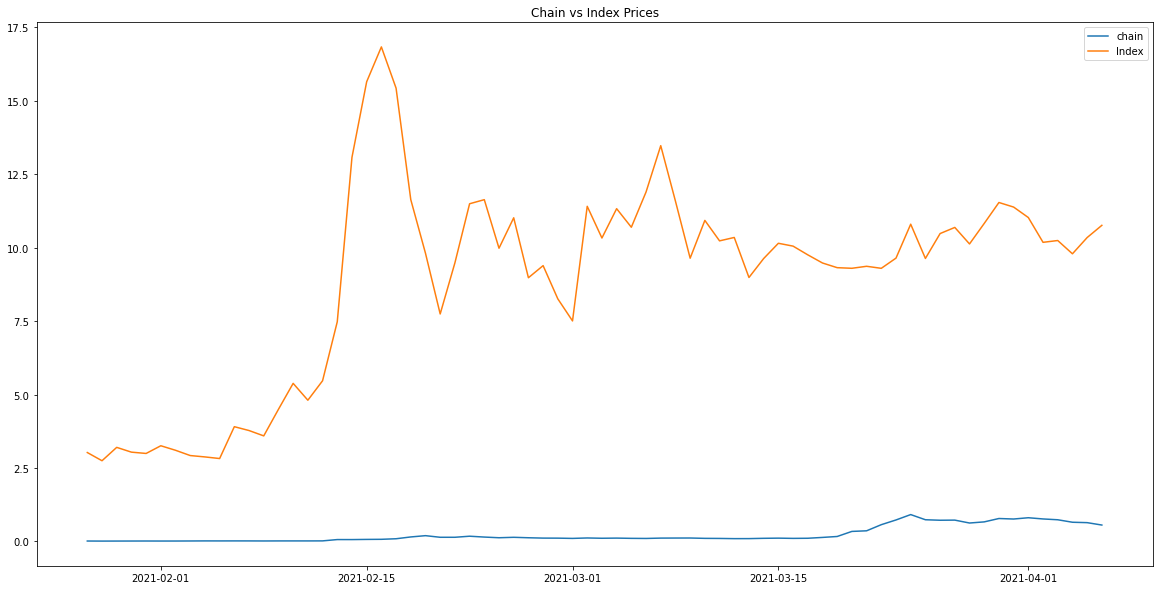

In [73]:
chain_v_index_prices_df.plot(figsize=[20,10], title="Chain vs Index Prices");

In [123]:
chain_v_index_prices_df_reset = chain_v_index_prices_df.reset_index()
chain_v_index_prices_df_reset.tail()

,index,chain,Index
65,2021-04-02,0.767179,10.185568
66,2021-04-03,0.739599,10.247017
67,2021-04-04,0.655224,9.795024
68,2021-04-05,0.641372,10.347986
69,2021-04-06,0.559797,10.764077


______________________________________________________
# Plot Scaled Graph of INdex and Chaingames
_____________________________________________

In [124]:
from sklearn import preprocessing
min_max_scaler_chainidx = preprocessing.MinMaxScaler(feature_range=(0, 100))
scaled_chainidx_prices = min_max_scaler_chainidx.fit_transform(chain_v_index_prices_df)
# scaled_chainidx_prices

In [125]:
new_columns = ["chain_scaled", "index_scaled"]
df_chainidx_price_scaled = pd.DataFrame(scaled_chainidx_prices, columns = new_columns)
df_chainidx_price_scaled.tail()

,chain_scaled,index_scaled
65,83.507414,52.777889
66,80.451858,53.214012
67,71.103866,50.006084
68,69.569190,53.930620
69,60.531541,56.883733


In [134]:
combined_df_indexchain = pd.concat(
    [chain_v_index_prices_df_reset, df_chainidx_price_scaled], axis="columns", join="inner"
)

combined_df_indexchain = combined_df_indexchain.rename(columns={
    "index": "date"
})

combined_df_indexchain = combined_df_indexchain.set_index(combined_df_indexchain['date'])
combined_df_indexchain.tail()

,date,chain,Index,chain_scaled,index_scaled
date,,,,,
2021-04-02,2021-04-02,0.767179,10.185568,83.507414,52.777889
2021-04-03,2021-04-03,0.739599,10.247017,80.451858,53.214012
2021-04-04,2021-04-04,0.655224,9.795024,71.103866,50.006084
2021-04-05,2021-04-05,0.641372,10.347986,69.569190,53.930620
2021-04-06,2021-04-06,0.559797,10.764077,60.531541,56.883733


In [135]:
scaled_chain_index_df = combined_df_indexchain.drop(columns=['date', 'chain', 'Index'])
scaled_chain_index_df.tail()

,chain_scaled,index_scaled
date,,
2021-04-02,83.507414,52.777889
2021-04-03,80.451858,53.214012
2021-04-04,71.103866,50.006084
2021-04-05,69.569190,53.930620
2021-04-06,60.531541,56.883733


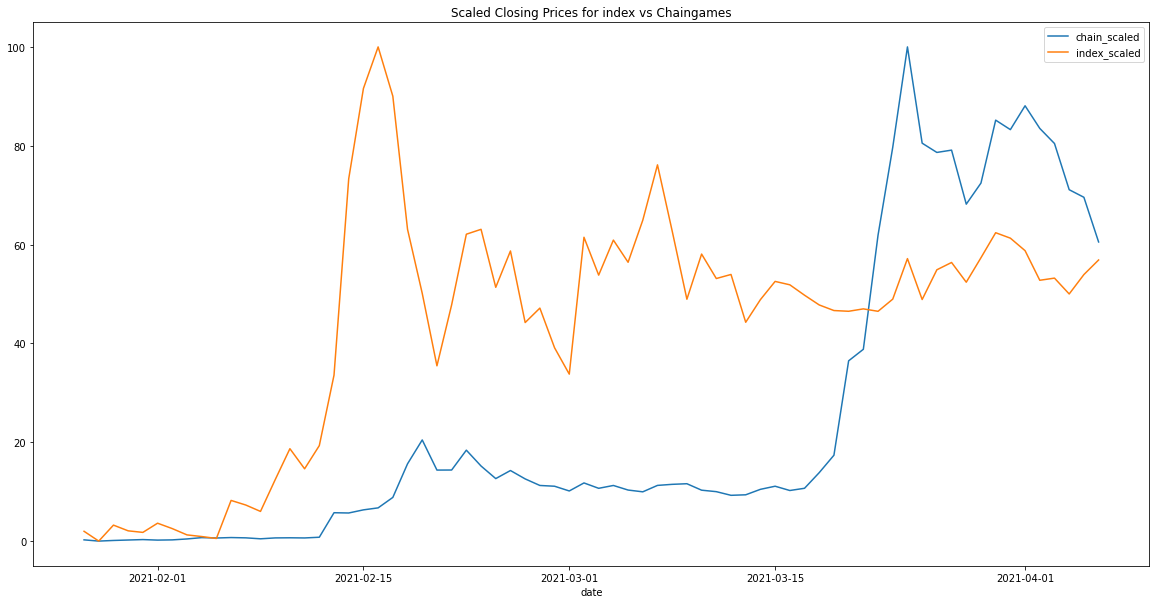

In [138]:
scaled_chain_index_df.plot(figsize=[20,10], title="Scaled Closing Prices for index vs Chaingames");

0     2021-01-27
1     2021-01-28
2     2021-01-29
3     2021-01-30
4     2021-01-31
         ...    
65    2021-04-02
66    2021-04-03
67    2021-04-04
68    2021-04-05
69    2021-04-06
Name: index, Length: 70, dtype: object

________________________________________________
### Correlations
________________________________________________

In [31]:
chain_v_index_prices_df.corr()

,chain,Index
chain,1.000000,0.368561
Index,0.368561,1.000000


### Calculate Daily Returns

In [32]:
daily_returns = chain_v_index_prices_df.pct_change().dropna()
daily_returns

,chain,Index
2021-01-28,-0.143571,-0.092233
2021-01-29,0.085796,0.165640
2021-01-30,0.055660,-0.050818
2021-01-31,0.051836,-0.014598
2021-02-01,-0.059344,0.087408
...,...,...
2021-04-02,-0.051129,-0.076526
2021-04-03,-0.035949,0.006033
2021-04-04,-0.114083,-0.044110
2021-04-05,-0.021141,0.056453


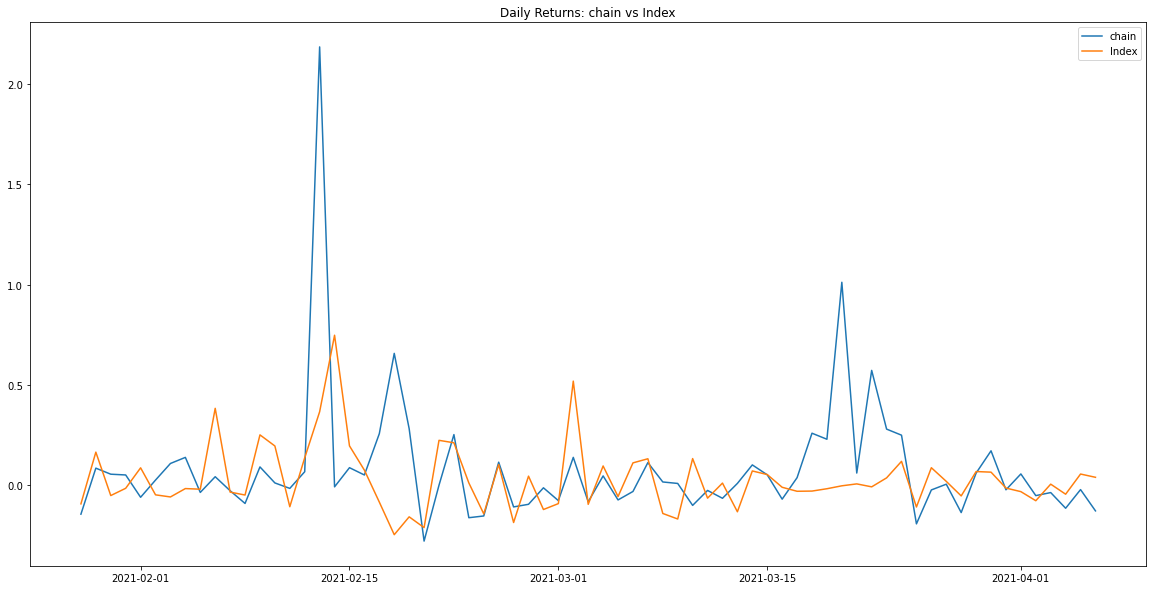

In [33]:
daily_returns.plot(figsize=[20,10], title="Daily Returns: chain vs Index");

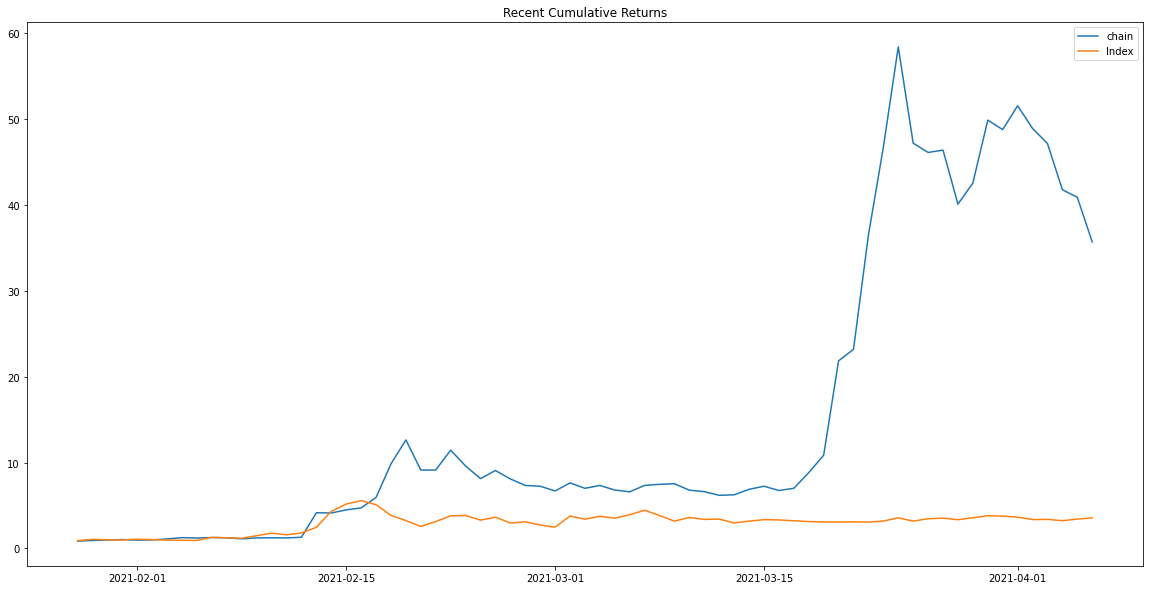

In [34]:
recent_cumulative_returns = (1 + daily_returns).cumprod()
recent_cumulative_returns.plot(figsize=[20,10], title="Recent Cumulative Returns");

### Calculate Variance of Index

In [35]:
# Calculate variance of all daily returns of AMZN vs. S&P 500
index_variance = daily_returns['Index'].var()
print(f"the Index Variance is {round(index_variance, 2)}")

the Index Variance is 0.03


In [39]:
chain_variance = daily_returns['chain'].var()
print(f"the Chain Variance is {round(chain_variance, 2)}")

the Chain Variance is 0.1


### Calculate Covariance of MANA returns vs. Index Returns

In [40]:
covariance = daily_returns['chain'].cov(daily_returns['Index'])
print(f"the Covariance is {round(covariance, 4)}")

the Covariance is 0.012


### Calculate Beta of MANA

In [41]:
chain_beta = covariance / chain_variance
print(f"the chain Beta is is {round(chain_beta, 4)}")
print("A beta between 0 and 1 signifies that it moves in the same direction as the market, but with less volatility—that is, smaller percentage changes—than the market as a whole.")

the chain Beta is is 0.1157
A beta between 0 and 1 signifies that it moves in the same direction as the market, but with less volatility—that is, smaller percentage changes—than the market as a whole.
